# **Hand Written Digit Prediction** **-** **Classification** **Analysis**

# Objective

The digits database consists of 8x8 pixel imagesof digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target of the dataset stores the digit each image represents

# Data Source

# Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt

# Import Data

In [4]:
from sklearn.datasets import load_digits

In [5]:
df = load_digits()

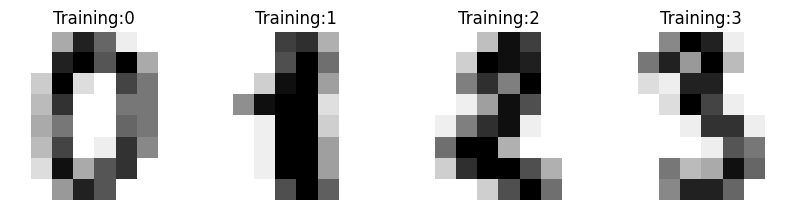

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image,label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Training:%i" % label)

## Data Preprocessing

### Flatten image

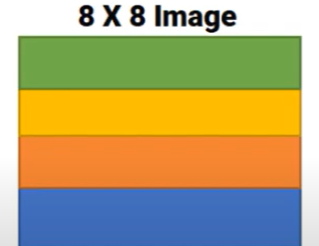

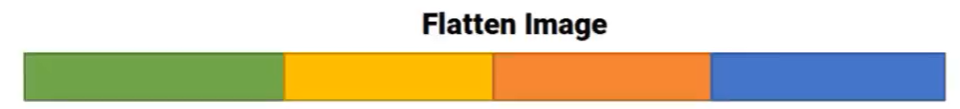

In [7]:
df.images.shape

(1797, 8, 8)

In [8]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
df.images[0].shape

(8, 8)

In [10]:
len(df.images)

1797

In [12]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [13]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
data[0].shape

(64,)

In [15]:
data.shape

(1797, 64)

# Scaling Image Data

In [16]:
data.min()

0.0

In [17]:
data.max()

16.0

In [20]:
data = data/16

In [21]:
data.min()

0.0

In [22]:
data.max()

0.0625

In [24]:
data[0]

array([0.        , 0.        , 0.01953125, 0.05078125, 0.03515625,
       0.00390625, 0.        , 0.        , 0.        , 0.        ,
       0.05078125, 0.05859375, 0.0390625 , 0.05859375, 0.01953125,
       0.        , 0.        , 0.01171875, 0.05859375, 0.0078125 ,
       0.        , 0.04296875, 0.03125   , 0.        , 0.        ,
       0.015625  , 0.046875  , 0.        , 0.        , 0.03125   ,
       0.03125   , 0.        , 0.        , 0.01953125, 0.03125   ,
       0.        , 0.        , 0.03515625, 0.03125   , 0.        ,
       0.        , 0.015625  , 0.04296875, 0.        , 0.00390625,
       0.046875  , 0.02734375, 0.        , 0.        , 0.0078125 ,
       0.0546875 , 0.01953125, 0.0390625 , 0.046875  , 0.        ,
       0.        , 0.        , 0.        , 0.0234375 , 0.05078125,
       0.0390625 , 0.        , 0.        , 0.        ])

# Train Test Split Data

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_test, y_test= train_test_split(data, df.target, test_size=0.3)

In [29]:
X_train.shape , X_test.shape , y_test.shape , y_test.shape

((1257, 64), (540, 64), (540,), (540,))

# Random Forest Model

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier()

In [37]:
rf.fit(X_test, y_test)

RandomForestClassifier()

# Predict Test Data

In [38]:
y_pred = rf.predict(X_test)

In [39]:
y_pred

array([5, 9, 9, 5, 0, 6, 5, 4, 6, 5, 7, 8, 8, 0, 9, 2, 7, 6, 6, 0, 7, 2,
       0, 5, 5, 7, 2, 7, 7, 3, 6, 2, 6, 7, 8, 1, 9, 0, 5, 0, 5, 1, 3, 2,
       7, 6, 6, 4, 9, 3, 8, 5, 1, 4, 6, 3, 0, 4, 0, 2, 8, 5, 0, 6, 2, 4,
       7, 5, 3, 2, 5, 9, 2, 0, 5, 6, 6, 8, 1, 6, 1, 0, 9, 9, 0, 8, 7, 0,
       3, 9, 4, 1, 1, 8, 4, 3, 9, 8, 8, 7, 6, 4, 6, 3, 3, 8, 1, 6, 3, 2,
       1, 2, 0, 4, 8, 3, 6, 8, 4, 6, 8, 4, 5, 7, 1, 2, 3, 3, 0, 8, 0, 1,
       8, 3, 3, 3, 0, 6, 6, 6, 6, 2, 1, 6, 3, 0, 8, 2, 5, 7, 7, 7, 5, 8,
       8, 8, 1, 8, 0, 2, 9, 1, 1, 6, 4, 1, 6, 8, 5, 7, 0, 4, 5, 5, 6, 8,
       9, 0, 4, 9, 2, 7, 8, 6, 2, 9, 3, 6, 0, 3, 7, 7, 4, 1, 9, 3, 3, 0,
       1, 1, 0, 8, 8, 2, 0, 9, 5, 7, 0, 7, 7, 4, 1, 1, 2, 1, 3, 5, 2, 5,
       7, 4, 5, 8, 5, 4, 5, 8, 2, 4, 2, 2, 7, 4, 4, 7, 9, 2, 8, 8, 6, 6,
       0, 2, 7, 3, 0, 9, 9, 4, 0, 1, 3, 1, 3, 5, 5, 3, 4, 1, 8, 4, 0, 7,
       4, 8, 3, 0, 2, 9, 7, 4, 7, 3, 5, 5, 8, 0, 9, 6, 5, 1, 4, 9, 3, 4,
       1, 4, 7, 2, 6, 2, 2, 9, 7, 6, 2, 4, 7, 7, 6,

# Model Evaluation

In [40]:
from sklearn.metrics import confusion_matrix,classification_report

In [41]:
confusion_matrix(y_test, y_pred)

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 56,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 48,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 61,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 51,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 48]])

# Prediction

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        51
           4       1.00      1.00      1.00        56
           5       1.00      1.00      1.00        48
           6       1.00      1.00      1.00        59
           7       1.00      1.00      1.00        61
           8       1.00      1.00      1.00        51
           9       1.00      1.00      1.00        48

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540



# Explaination

The Handwritten Digit Prediction task involves classifying images of handwritten digits (0-9). Each image is an 8x8 grid of pixels, where each pixel has a grayscale value (0 to 16, with 0 being black and 16 being white).

The dataset has two parts:
1. **Images**: These are 8x8 pixel arrays representing handwritten digits.
2. **Target (Labels)**: These are the actual digits (0-9) that the images represent.

For example, an image of the number "5" will have a specific pattern of pixel values, and its label will be 5.

The goal is to use machine learning to train a model that can look at a new 8x8 image and correctly predict the digit (0-9) it represents.

Train a model to recognize handwritten digits based on the pixel values of 8x8 images.